In [1]:
import importlib 
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
import sys 
sys.path.append("../../RedPitaya")

In [3]:
import redpitaya_mca as mca
importlib.reload(mca)

<module 'redpitaya_mca' from '../../RedPitaya\\redpitaya_mca.py'>

In [4]:
red_mca = mca.mca()
ssh = red_mca.ssh_connect()

In [25]:
length = 65536
nbytes = 2
dec = 16
chan = 1
freq = 125e6/dec
sample = 1/freq 
red_mca.config_scope(dec=dec, trig_chan=chan, trig_slope=0, trig_mode=0, trig_level=1000)
time.sleep(2)

0 131072
1 131072
2 131072
3 131072
4 131072
5 131072
6 131072
7 131072
8 131072
9 131072
10 131072
11 131072
12 131072
13 131072
14 131072
15 131072
16 131072
17 131072
18 131072
19 131072
20 131072
21 131072
22 131072
23 131072
24 131072
25 131072
26 131072
27 131072
28 131072
29 131072


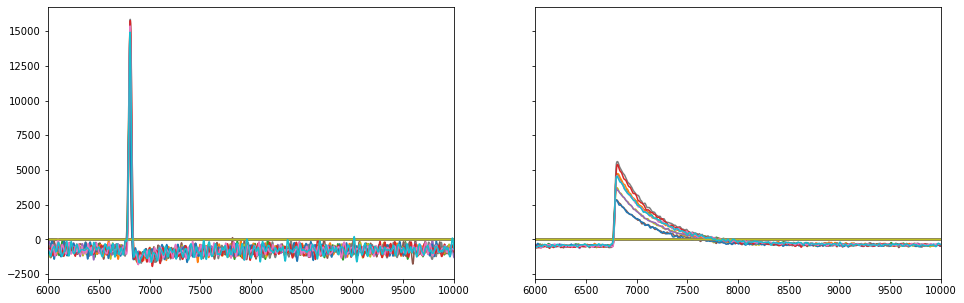

In [26]:
fig,ax = plt.subplots(figsize=(16,5), ncols=2,nrows=1,sharey=True,facecolor='white')
for x in range(30):    
    red_mca.acq_scope(dec=dec, chan=chan, trig_chan=chan, trig_slope=0, trig_mode=0, trig_level=10000, samples_pre=5000, samples_total=length, wait=.5)    
    data = red_mca._socket.recv(length*nbytes*2)
    converted_data = []
    for i in range(int(len(data)/nbytes)):
        converted_data.append(int.from_bytes(data[(i*nbytes):((i+1)*nbytes)], byteorder='little', signed=True))
    print(x,len(converted_data))
    ax[0].plot(converted_data[0::2])
    ax[1].plot(converted_data[1::2])
ax[0].set_xlim(6000,10000)
ax[1].set_xlim(6000,10000)
plt.show() 

In [7]:
# ssh.exec_command('reboot')
# red_mca.stop_mca()
# red_mca.close()